In [2]:
!pip install Faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.4 MB/s eta 0:00:00


In [4]:
from faker import Faker
import random
import numpy as np
import pandas as pd

In [71]:
np.random.seed(0)
num_samples=1000
Degree=['Geekay','EMotorad','Swagtron','HERO','Montra']
choice=['Yes','No']
fake=Faker()
Seller=[fake.name() for _ in range(num_samples)]
Brand=[random.choice(Degree) for _ in range(num_samples)]
WheelSize=np.random.randint(12,30,size=num_samples)
Weight=np.random.randint(18,40,size=num_samples)
Gears=np.random.randint(1,5,size=num_samples)
Lights = [random.choice(choice) for _ in range(num_samples)]
Mudguard = [random.choice(choice) for _ in range(num_samples)]
data=pd.DataFrame({
    'Seller Name':Seller,
    'Brand':Brand,
    'Wheel Size':WheelSize,
    'Weight':Weight,
    'Gears':Gears,
    'Lights':Lights,
    'Mudguard':Mudguard,
    })
def calculatePrice(row):
    price= 10 * row['Wheel Size'] + 200 * row['Weight'] + 250 * row['Gears'] + 1500
    if row['Lights']=="Yes":
        price+= 2000
    if row['Mudguard']=="Yes":
        price+=1000
    price = np.round(price, 2)
    return price
data['Price']=data.apply(calculatePrice,axis=1)
missing_values_prob = 0.03
for column in data.columns:
 if column=='Seller Name':
    continue
 data[column] = data[column].apply(lambda x: np.nan if random.random() < missing_values_prob else x)
data.head(n=10)
csv_filename = 'bicycle.csv'
data.to_csv(csv_filename, index=False)

In [24]:
data.isnull()

,Seller Name,Brand,Wheel Size,Weight,Gears,Lights,Mudguard,Price
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False
3,False,False,False,False,True,False,False,False
4,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...
995,False,True,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,True,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [25]:
data.isnull().sum()

Seller Name     0
Brand          33
Wheel Size     38
Weight         21
Gears          33
Lights         26
Mudguard       37
Price          20
dtype: int64

In [26]:
missing_count=data.isnull().sum()
missing_percentage = (missing_count / len(data)) * 100
print(missing_percentage)

Seller Name    0.0
Brand          3.3
Wheel Size     3.8
Weight         2.1
Gears          3.3
Lights         2.6
Mudguard       3.7
Price          2.0
dtype: float64


<Axes: >

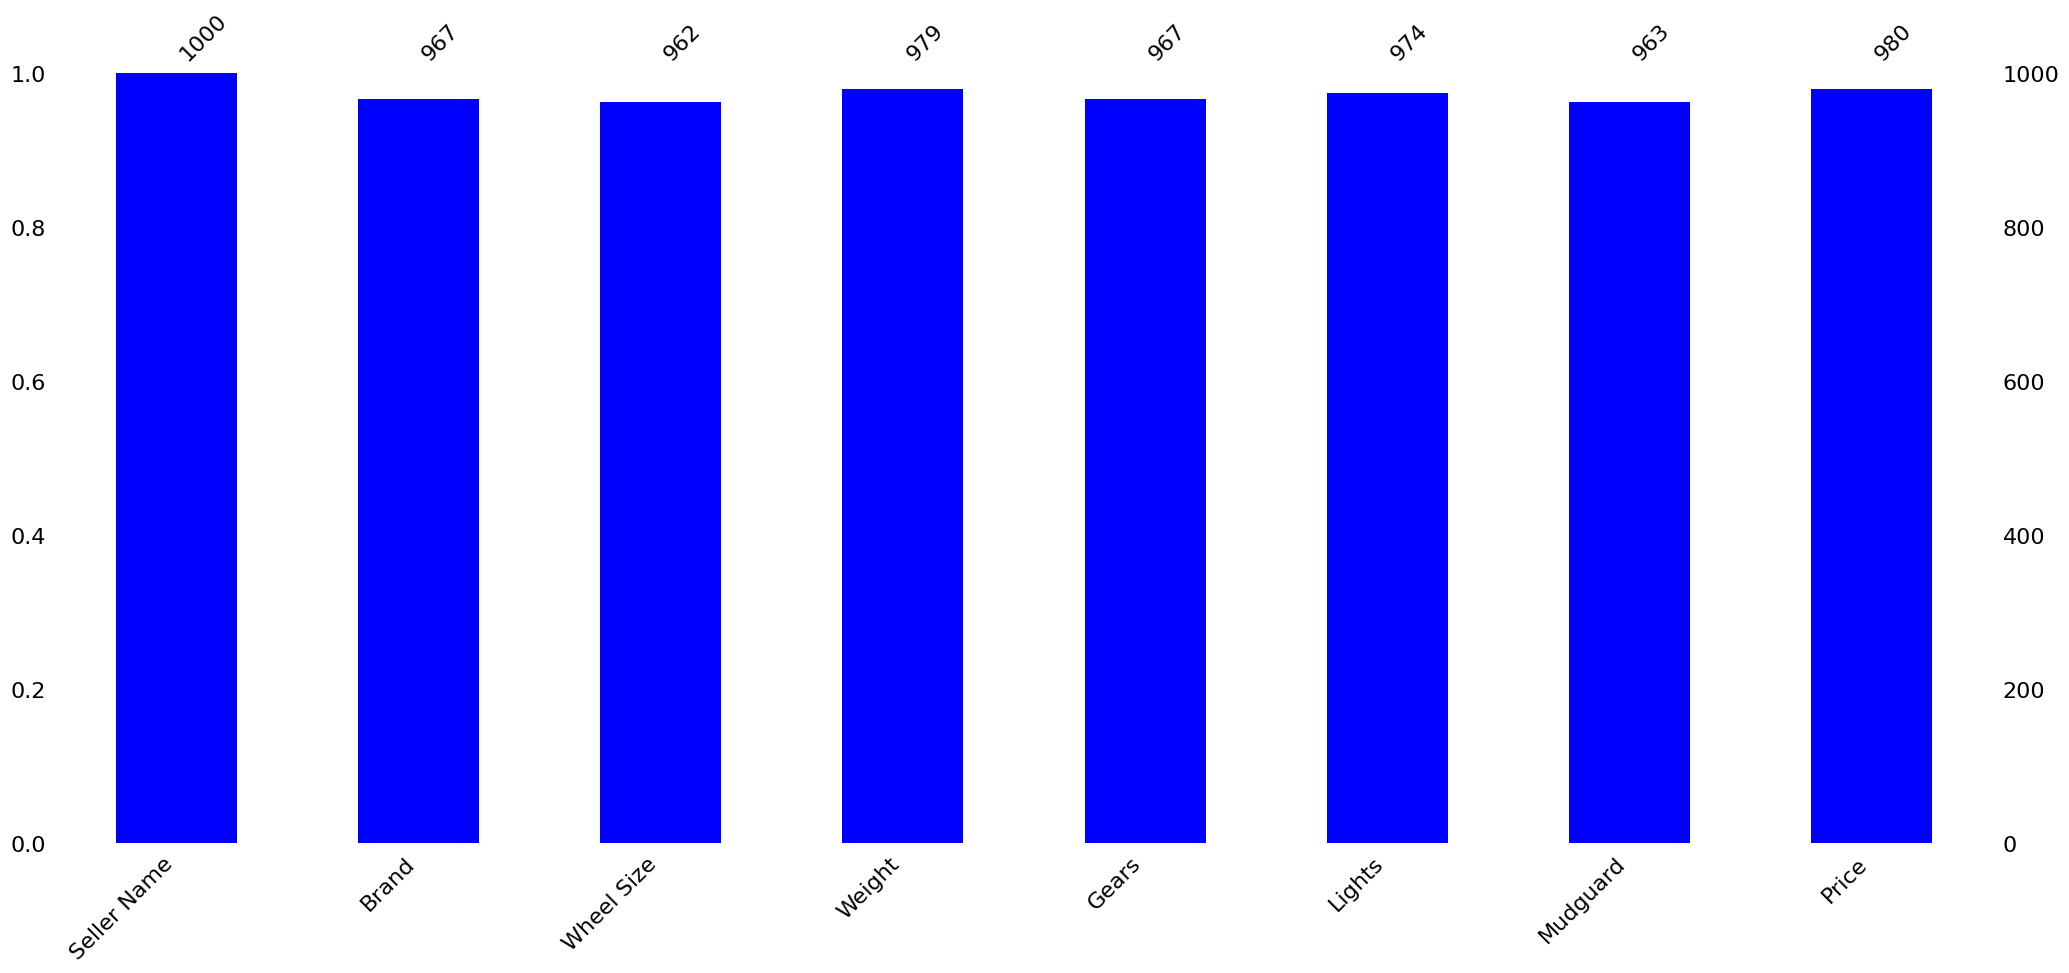

In [28]:
import missingno as msno
msno.bar(data,color='blue')

In [29]:
most_frequent_brand = data['Brand'].mode()[0]
data['Brand'].fillna(most_frequent_brand, inplace=True)
data.head(n=10)

,Seller Name,Brand,Wheel Size,Weight,Gears,Lights,Mudguard,Price
0,Jose Sanchez,Montra,24.0,35.0,2.0,Yes,No,11240.0
1,Kathleen Fletcher,Swagtron,27.0,37.0,4.0,Yes,No,12170.0
2,Kevin Rodriguez,EMotorad,12.0,30.0,1.0,No,NaN,8870.0
3,Sharon Ramirez,Montra,15.0,35.0,NaN,Yes,No,11150.0
4,Andrew Rhodes,Swagtron,15.0,18.0,1.0,NaN,Yes,8500.0
5,Seth Johnson,HERO,19.0,19.0,3.0,No,No,6240.0
6,James Webster,Swagtron,21.0,22.0,2.0,No,No,6610.0
7,Joseph Coleman,EMotorad,16.0,28.0,1.0,No,No,7510.0
8,Kelsey Lewis,Montra,18.0,28.0,NaN,Yes,Yes,10530.0
9,Mary Donaldson,Geekay,24.0,18.0,4.0,No,Yes,7340.0


In [30]:
most_frequent_Lights = data['Lights'].mode()[0]
data['Lights'].fillna(most_frequent_Lights, inplace=True)
most_frequent_Mudguard = data['Mudguard'].mode()[0]
data['Mudguard'].fillna(most_frequent_Mudguard, inplace=True)
data.head(n=10)

,Seller Name,Brand,Wheel Size,Weight,Gears,Lights,Mudguard,Price
0,Jose Sanchez,Montra,24.0,35.0,2.0,Yes,No,11240.0
1,Kathleen Fletcher,Swagtron,27.0,37.0,4.0,Yes,No,12170.0
2,Kevin Rodriguez,EMotorad,12.0,30.0,1.0,No,Yes,8870.0
3,Sharon Ramirez,Montra,15.0,35.0,NaN,Yes,No,11150.0
4,Andrew Rhodes,Swagtron,15.0,18.0,1.0,Yes,Yes,8500.0
5,Seth Johnson,HERO,19.0,19.0,3.0,No,No,6240.0
6,James Webster,Swagtron,21.0,22.0,2.0,No,No,6610.0
7,Joseph Coleman,EMotorad,16.0,28.0,1.0,No,No,7510.0
8,Kelsey Lewis,Montra,18.0,28.0,NaN,Yes,Yes,10530.0
9,Mary Donaldson,Geekay,24.0,18.0,4.0,No,Yes,7340.0


In [32]:
#1

average_price=data['Price'].mean()
print(f"Average Price: {average_price:.2f} INR\n")

Average Price: 9591.27 INR



In [34]:
#2

average_size=data['Wheel Size'].mean()
print(f"Average Wheel Size: {average_size:.2f} inch\n")

Average Wheel Size: 20.30 inch



In [35]:
#3

average_Gears=int(data['Gears'].mean())
print(f"Average Number of Gears: {average_Gears:.2f}\n")

Average Number of Gears: 2.00



In [37]:
#4

average_weight=int(data['Weight'].mean())
print(f"Average Weight: {average_weight:.2f} pounds\n")

Average Weight: 28.00 pounds



In [38]:
#5

kk = data.groupby(['Brand', 'Lights']).size().unstack(fill_value=0)
print("\nBrand Distribution with Lights:")
print(kk)


Brand Distribution with Lights:
Lights     No  Yes
Brand             
EMotorad   82  100
Geekay     97  102
HERO       94   93
Montra    106  130
Swagtron   98   98


In [39]:
#6

kk = data.groupby(['Brand', 'Mudguard']).size().unstack(fill_value=0)
print("\nBrand Distribution with Mudguard:")
print(kk)


Brand Distribution with Mudguard:
Mudguard   No  Yes
Brand             
EMotorad   77  105
Geekay     95  104
HERO       97   90
Montra    108  128
Swagtron   95  101


In [40]:
data['Weight'].fillna(average_weight, inplace=True)
data['Gears'].fillna(average_Gears, inplace=True)
data['Wheel Size'].fillna(average_size, inplace=True)
data['Price'].fillna(average_price, inplace=True)
data.head(n=10)

,Seller Name,Brand,Wheel Size,Weight,Gears,Lights,Mudguard,Price
0,Jose Sanchez,Montra,24.0,35.0,2.0,Yes,No,11240.0
1,Kathleen Fletcher,Swagtron,27.0,37.0,4.0,Yes,No,12170.0
2,Kevin Rodriguez,EMotorad,12.0,30.0,1.0,No,Yes,8870.0
3,Sharon Ramirez,Montra,15.0,35.0,2.0,Yes,No,11150.0
4,Andrew Rhodes,Swagtron,15.0,18.0,1.0,Yes,Yes,8500.0
5,Seth Johnson,HERO,19.0,19.0,3.0,No,No,6240.0
6,James Webster,Swagtron,21.0,22.0,2.0,No,No,6610.0
7,Joseph Coleman,EMotorad,16.0,28.0,1.0,No,No,7510.0
8,Kelsey Lewis,Montra,18.0,28.0,2.0,Yes,Yes,10530.0
9,Mary Donaldson,Geekay,24.0,18.0,4.0,No,Yes,7340.0


In [41]:
data.info

<bound method DataFrame.info of                Seller Name     Brand  Wheel Size  Weight  Gears Lights  \
0             Jose Sanchez    Montra   24.000000    35.0    2.0    Yes   
1        Kathleen Fletcher  Swagtron   27.000000    37.0    4.0    Yes   
2          Kevin Rodriguez  EMotorad   12.000000    30.0    1.0     No   
3           Sharon Ramirez    Montra   15.000000    35.0    2.0    Yes   
4            Andrew Rhodes  Swagtron   15.000000    18.0    1.0    Yes   
..                     ...       ...         ...     ...    ...    ...   
995           Michael Cook    Montra   14.000000    29.0    2.0     No   
996          Tina Erickson  Swagtron   14.000000    20.0    2.0     No   
997  Elizabeth Vasquez PhD      HERO   20.303534    24.0    4.0    Yes   
998            Brian Tyler      HERO   19.000000    24.0    4.0    Yes   
999      Victoria Jacobson    Montra   25.000000    30.0    1.0    Yes   

    Mudguard    Price  
0         No  11240.0  
1         No  12170.0  
2      

In [42]:
data.describe()

,Wheel Size,Weight,Gears,Price
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.303534,28.501000,2.517000,9591.265306
std,5.139629,6.170257,1.096774,1684.676873
min,12.000000,18.000000,1.000000,5520.000000
25%,16.000000,23.000000,2.000000,8400.000000
50%,20.000000,28.000000,3.000000,9575.000000
75%,25.000000,34.000000,3.000000,10860.000000
max,29.000000,39.000000,4.000000,13530.000000


In [44]:
for col in data.columns:
    num_unique = data[col].nunique()
    print(f"{col}: {num_unique}")

Seller Name: 993
Brand: 5
Wheel Size: 19
Weight: 22
Gears: 4
Lights: 2
Mudguard: 2
Price: 515


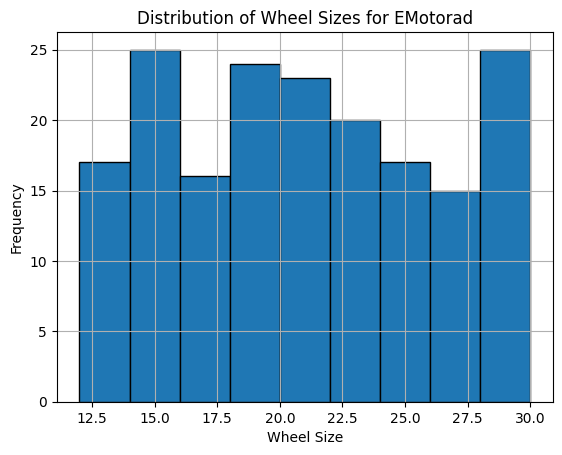

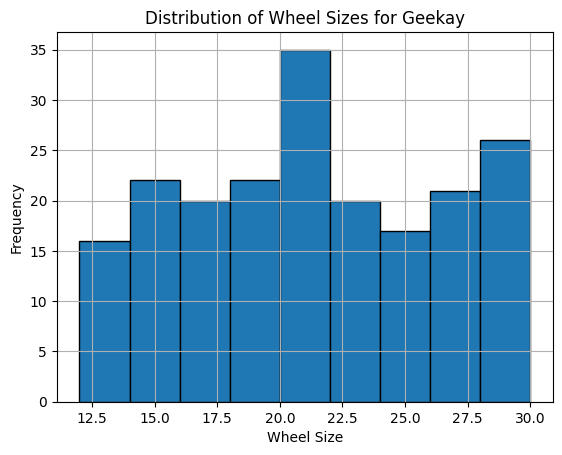

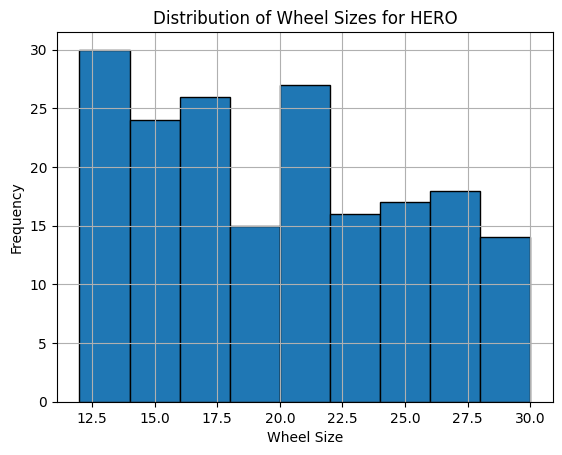

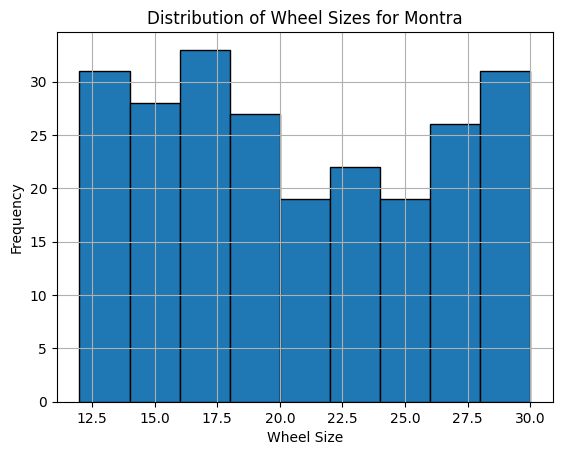

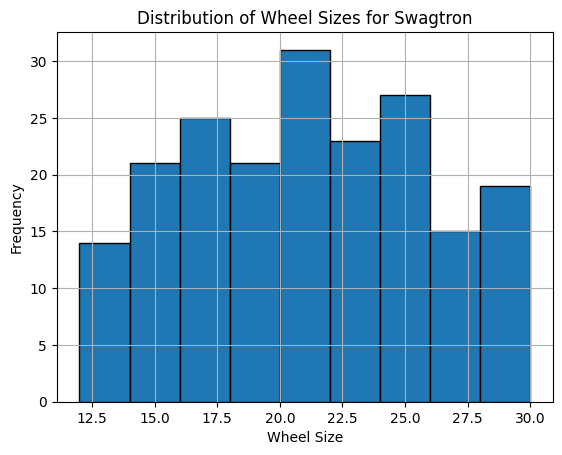

In [48]:
import matplotlib.pyplot as plt
data['Wheel Size'] = data['Wheel Size'].astype(int)
grouped = data.groupby('Brand')['Wheel Size']
for brand, group in grouped:
    plt.figure()
    group.hist(bins=list(range(group.min(), group.max() + 2, 2)), edgecolor='black')
    plt.title(f'Distribution of Wheel Sizes for {brand}')
    plt.xlabel('Wheel Size')
    plt.ylabel('Frequency')
    plt.show()

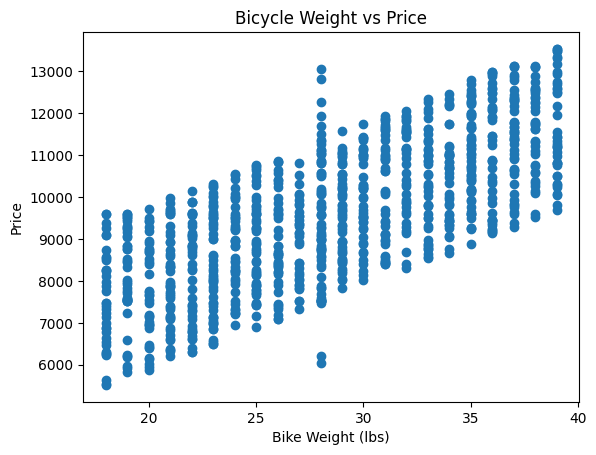

In [50]:
import matplotlib.pyplot as plt

plt.scatter(data['Weight'], data['Price'])

plt.xlabel('Bike Weight (lbs)')
plt.ylabel('Price')

plt.title('Bicycle Weight vs Price')

plt.show()

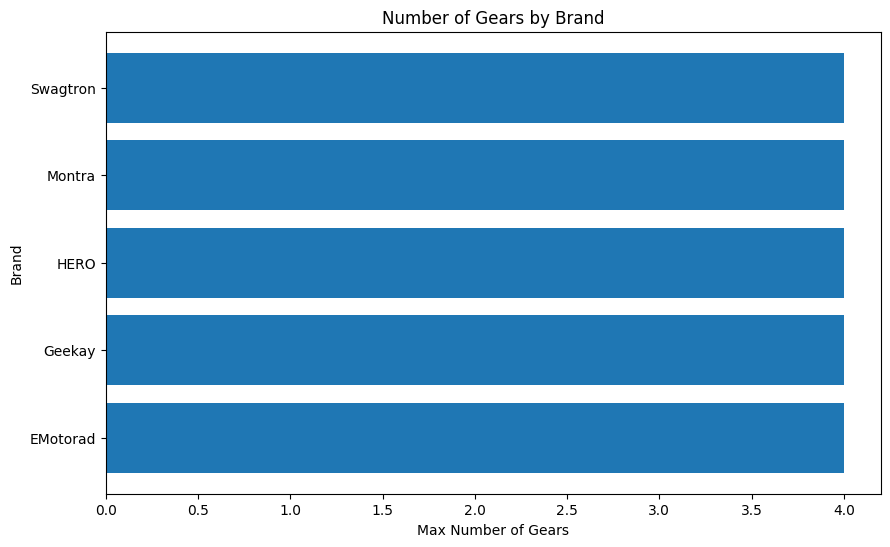

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
max_gears_by_seller = data.groupby('Brand')['Gears'].max()
max_gears_df = pd.DataFrame({'Brand': max_gears_by_seller.index, 'Max Number of Gears': max_gears_by_seller.values})
max_gears_df = max_gears_df.sort_values(by='Max Number of Gears', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(max_gears_df['Brand'], max_gears_df['Max Number of Gears'])
plt.xlabel('Max Number of Gears')
plt.ylabel('Brand')
plt.title('Number of Gears by Brand')
plt.show()

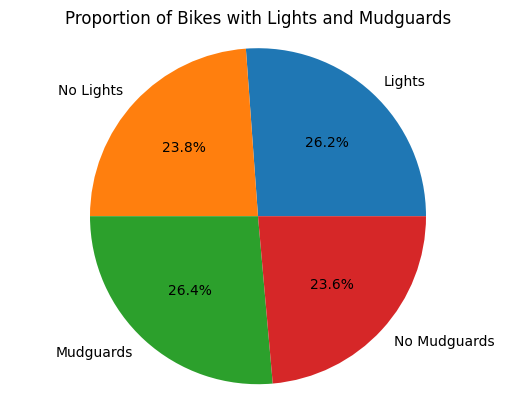

In [57]:
import matplotlib.pyplot as plt
lights_count = data[data['Lights'] == 'Yes']['Seller Name'].count()

mudguards_count = data[data['Mudguard'] == 'Yes']['Seller Name'].count()

lights_proportion = lights_count / data['Seller Name'].count()

mudguards_proportion = mudguards_count / data['Seller Name'].count()

fig, ax = plt.subplots()
ax.pie([lights_proportion, 1 - lights_proportion, mudguards_proportion, 1 - mudguards_proportion], labels=['Lights', 'No Lights', 'Mudguards', 'No Mudguards'], autopct='%1.1f%%')
ax.axis('equal')
plt.title('Proportion of Bikes with Lights and Mudguards')
plt.show()

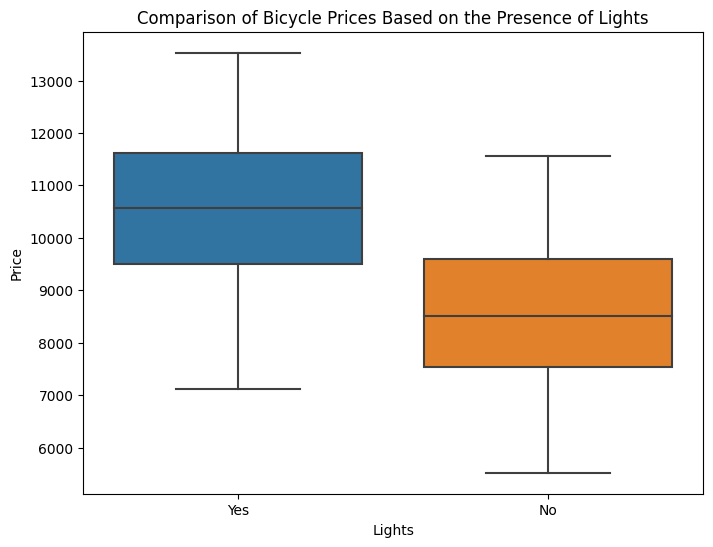

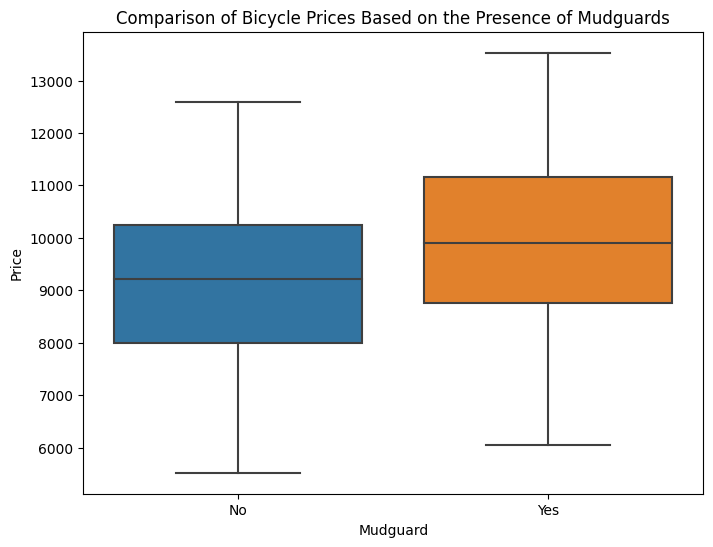

In [61]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='Lights', y='Price', data=data)
plt.title('Comparison of Bicycle Prices Based on the Presence of Lights')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Mudguard', y='Price', data=data)
plt.title('Comparison of Bicycle Prices Based on the Presence of Mudguards')
plt.show()

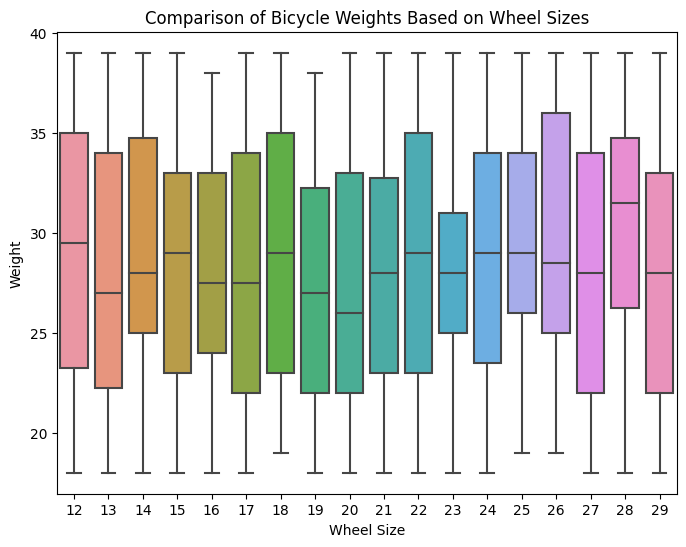

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='Wheel Size', y='Weight', data=data)
plt.title('Comparison of Bicycle Weights Based on Wheel Sizes')
plt.show()

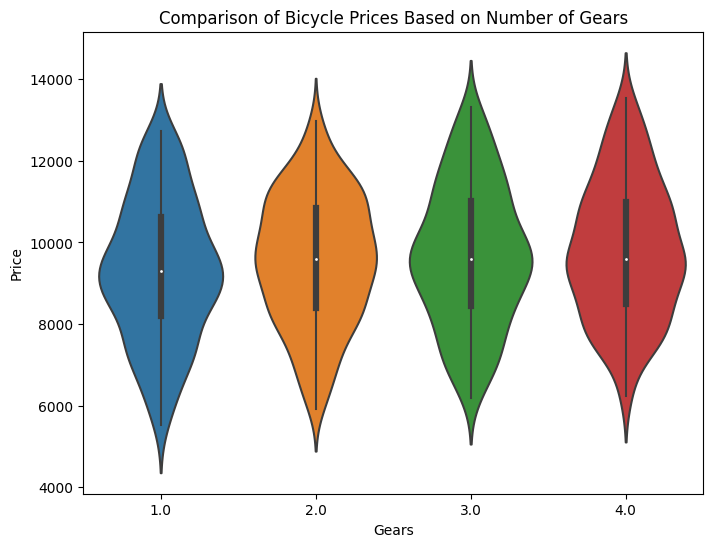

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.violinplot(x='Gears', y='Price', data=data)
plt.title('Comparison of Bicycle Prices Based on Number of Gears')
plt.show()

<ipython-input-69-018280d2bf7e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


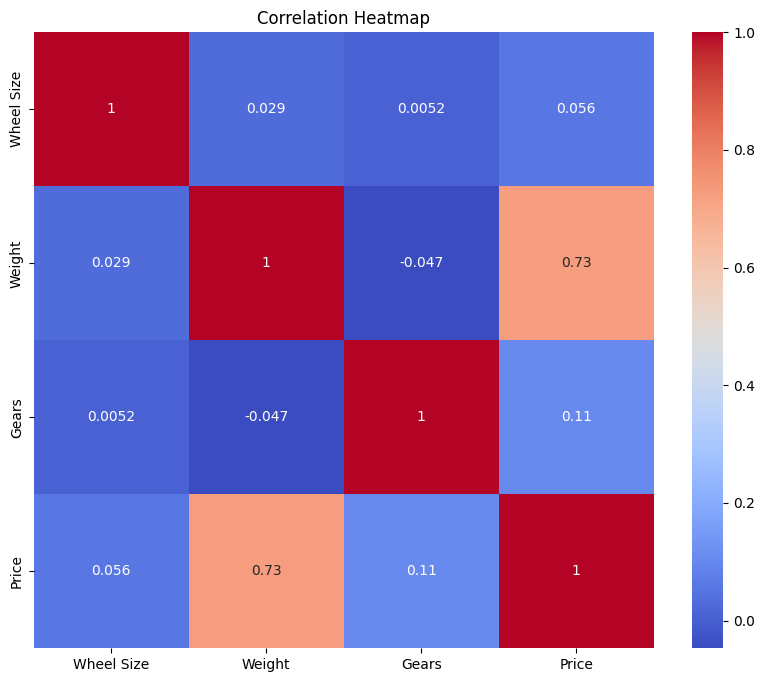

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [70]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

data['Log_Price'] = np.log1p(data['Price'])
data.drop('Price', axis=1, inplace=True)

scaler = MinMaxScaler()
data['Normalized_Area'] = scaler.fit_transform(data[['Weight']])
data.drop('Weight', axis=1, inplace=True)

data.drop(['Mudguard', 'Lights'], axis=1, inplace=True)

print("Transformed Dataset:")
print(data)
print("\n")

data.to_csv('transformed_data.csv', index=False)

Transformed Dataset:
               Seller Name     Brand  Wheel Size  Gears  Log_Price  \
0             Jose Sanchez    Montra          24    2.0   9.327323   
1        Kathleen Fletcher  Swagtron          27    4.0   9.406811   
2          Kevin Rodriguez  EMotorad          12    1.0   9.090543   
3           Sharon Ramirez    Montra          15    2.0   9.319284   
4            Andrew Rhodes  Swagtron          15    1.0   9.047939   
..                     ...       ...         ...    ...        ...   
995           Michael Cook    Montra          14    2.0   9.098403   
996          Tina Erickson  Swagtron          14    2.0   8.873608   
997  Elizabeth Vasquez PhD      HERO          20    4.0   9.163354   
998            Brian Tyler      HERO          19    4.0   9.158099   
999      Victoria Jacobson    Montra          25    1.0   9.305741   

     Normalized_Area  
0           0.809524  
1           0.904762  
2           0.571429  
3           0.809524  
4           0.000000  
